In [1]:
import numpy as np
import geopandas as gpd
from IPython.display import display
from shapely.geometry import Polygon
from utils import process_and_save_data
from model import EnhancedLandUsePredictionModel
from views import create_band_viewer, create_classification_viewer, create_spectral_indices_viewer, create_map_with_slider, analyze_time_series, plot_time_series, create_prediction_map_with_slider, create_prediction_viewer, visualize_predictions, ModelAnalysis


In [2]:
roi_coords = [
    [75.58679011123377, 26.725580815770467],
    [76.00152399795252, 26.725580815770467],
    [76.00152399795252, 27.08929110630265],
    [75.58679011123377, 27.08929110630265],
    [75.58679011123377, 26.725580815770467]
]

roi_polygon = Polygon(roi_coords)
roi_gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[roi_polygon])



Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-04-19_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-05-05_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-05-21_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-06-06_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-10-12_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-11-13_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-11-29_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2013-12-31_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2014-02-01_MTL.txt'
Error reading metadata file: [Errno 2] No such file or directory: 'DataSet\\2014-03-05_MTL.txt'
Error reading metadata file: [Errno 2] N

d:\Code\Python\CE712 Project - Integrating AI with Remote Sensing for Predictive Land Use Change Models\views.py:638: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


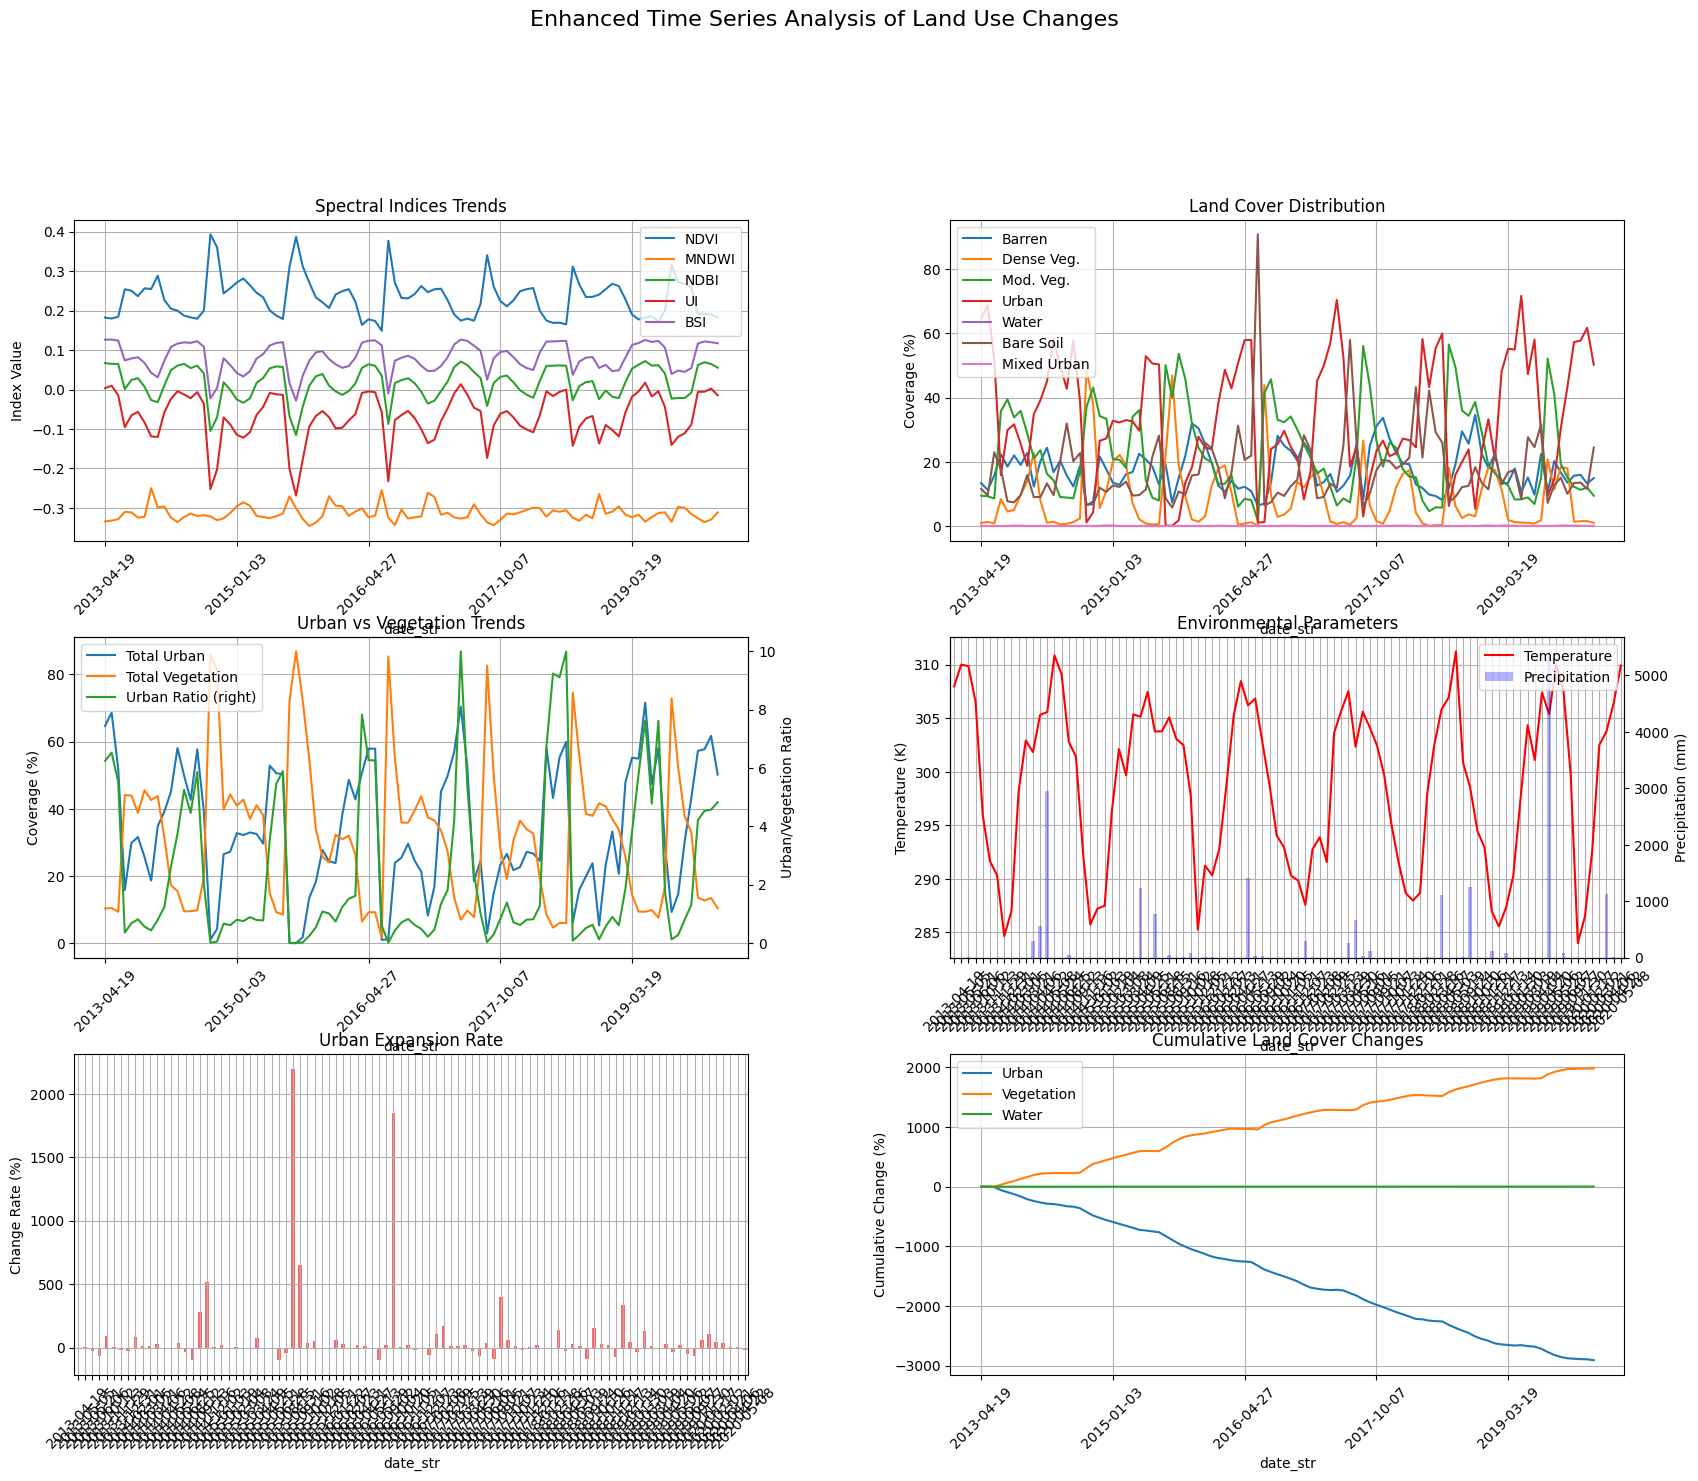

In [3]:
# Define file paths
data_dir = 'DataSet'
processed_dir = 'Processed_DataSet'
bounds = [[26.725580815770467, 75.58679011123377], 
         [27.08929110630265, 76.00152399795252]]

# Analyze time series
results = analyze_time_series(data_dir)

# Plot the time series results
plot_time_series(results)


In [4]:
all_processed_data = process_and_save_data(data_dir, processed_dir)


Loading pre-processed data...
Successfully loaded 2013-04-19_processed.pkl
Successfully loaded 2013-05-05_processed.pkl
Successfully loaded 2013-05-21_processed.pkl
Successfully loaded 2013-06-06_processed.pkl
Successfully loaded 2013-10-12_processed.pkl
Successfully loaded 2013-11-13_processed.pkl
Successfully loaded 2013-11-29_processed.pkl
Successfully loaded 2013-12-31_processed.pkl
Successfully loaded 2014-02-01_processed.pkl
Successfully loaded 2014-03-05_processed.pkl
Successfully loaded 2014-03-21_processed.pkl
Successfully loaded 2014-04-06_processed.pkl
Successfully loaded 2014-04-22_processed.pkl
Successfully loaded 2014-05-08_processed.pkl
Successfully loaded 2014-05-24_processed.pkl
Successfully loaded 2014-06-25_processed.pkl
Successfully loaded 2014-08-12_processed.pkl
Successfully loaded 2014-09-13_processed.pkl
Successfully loaded 2014-11-16_processed.pkl
Successfully loaded 2014-12-02_processed.pkl
Successfully loaded 2015-01-03_processed.pkl
Successfully loaded 2015-

In [5]:
band_viewer = create_band_viewer('DataSet')
display(band_viewer)


In [6]:
spectral_viewer = create_spectral_indices_viewer(all_processed_data)
display(spectral_viewer)


In [7]:
classification_viewer = create_classification_viewer(all_processed_data)
display(classification_viewer)


In [8]:
Map = create_map_with_slider(all_processed_data, bounds, roi_gdf)
Map


Map(center=[26.907436, 75.794157], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

In [9]:
'''
model = EnhancedLandUsePredictionModel(
        spatial_smoothing=1.0,
        window_size=3,
        n_estimators=50
    )

model.fit(all_processed_data, verbose=True, batch_size=10)

model.save_model('land_use_model.joblib')
'''


"\nmodel = EnhancedLandUsePredictionModel(\n        spatial_smoothing=1.0,\n        window_size=3,\n        n_estimators=50\n    )\n\nmodel.fit(all_processed_data, verbose=True, batch_size=10)\n\nmodel.save_model('land_use_model.joblib')\n"

In [10]:
model = EnhancedLandUsePredictionModel.load_model('land_use_model.joblib')


Model loaded from: land_use_model.joblib


In [11]:
predictions = model.predict_future(
        historical_window=all_processed_data[-24:],
        steps=3,
        verbose=True
    )

Starting prediction process...
Historical window size: 24
Requested prediction steps: 3

Generating 3 future predictions...

Generating prediction for step 1/3
Feature matrix shape: (2080540, 21)
Generated prediction for 2020-06-07
Unique predicted classes: [0 1 2]
Mean confidence: 0.996

Generating prediction for step 2/3
Feature matrix shape: (2080540, 21)
Generated prediction for 2020-07-07
Unique predicted classes: [0 1 2]
Mean confidence: 0.999

Generating prediction for step 3/3
Feature matrix shape: (2080540, 21)
Generated prediction for 2020-08-06
Unique predicted classes: [0 1 2]
Mean confidence: 0.999


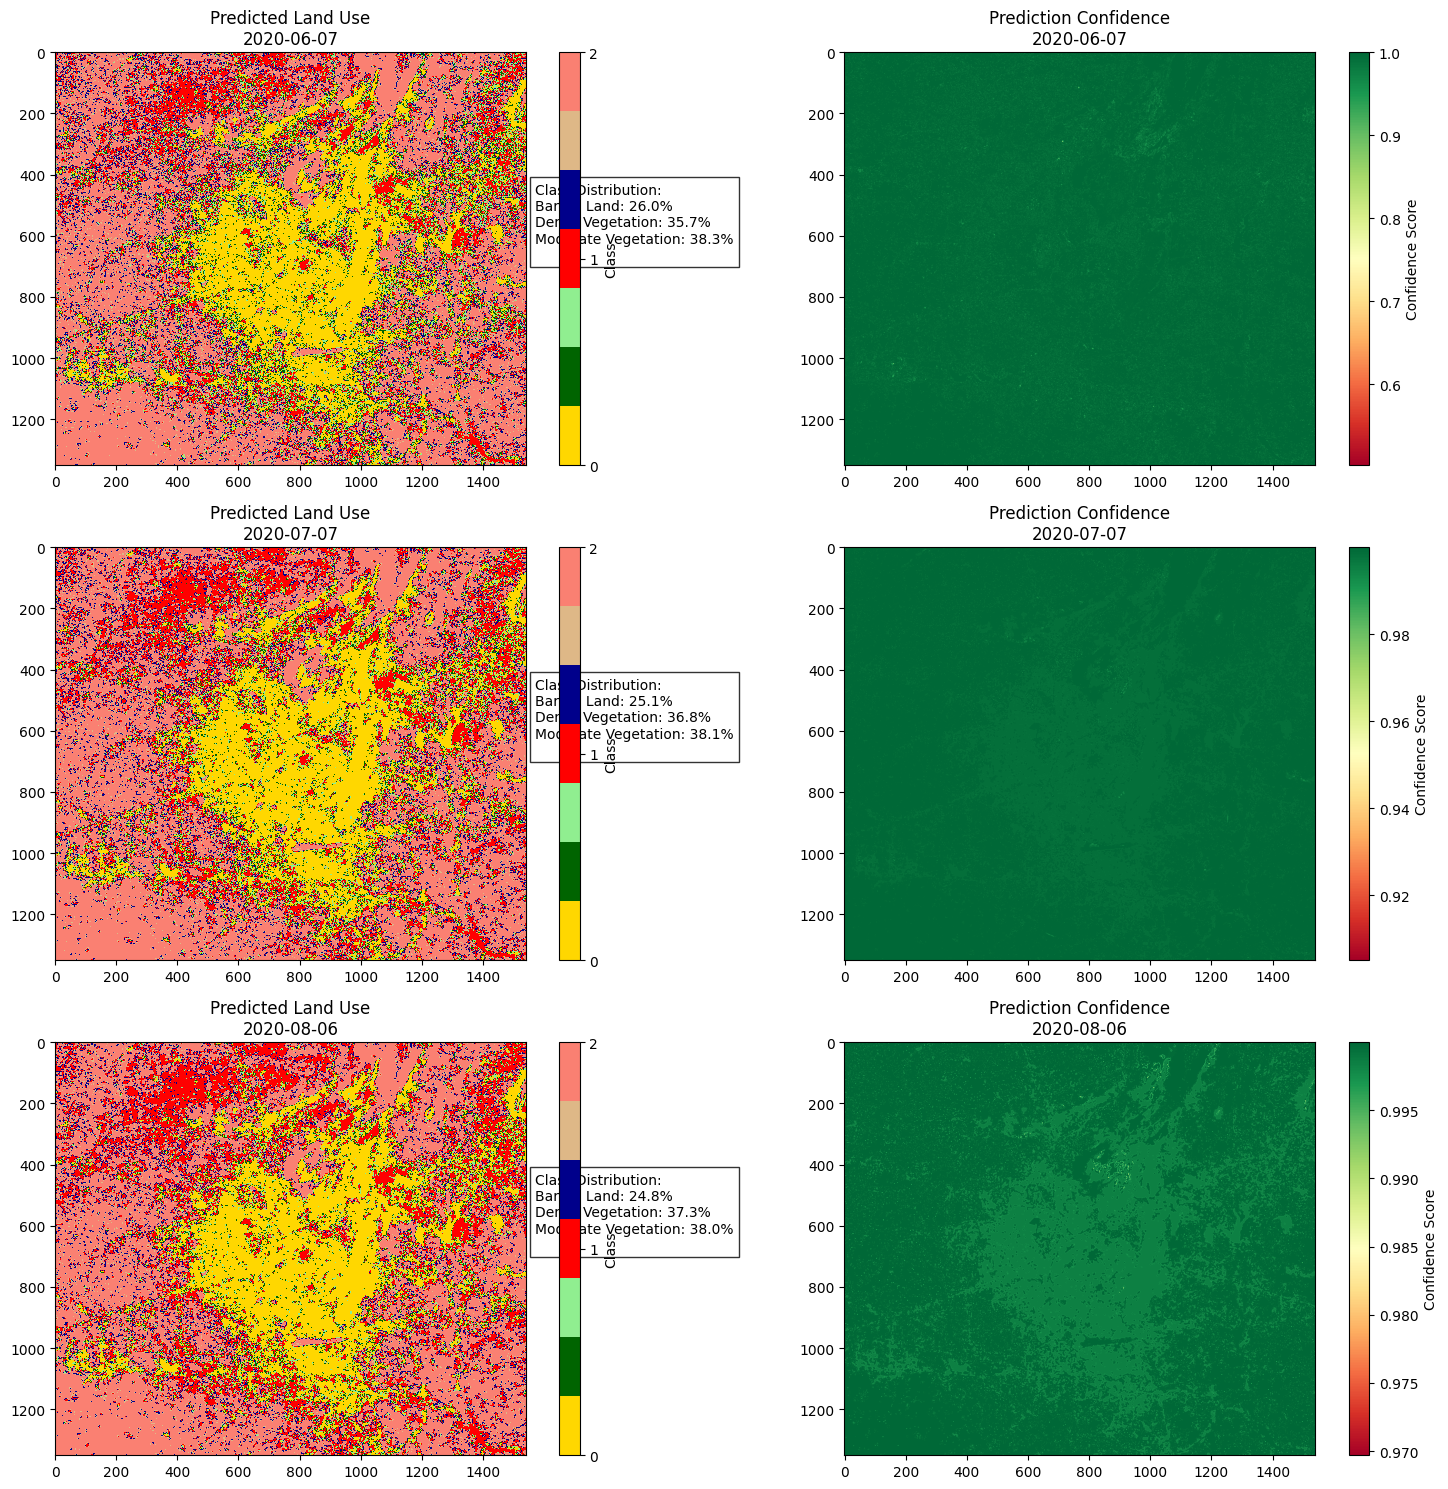

In [12]:
model.plot_prediction_results(predictions)

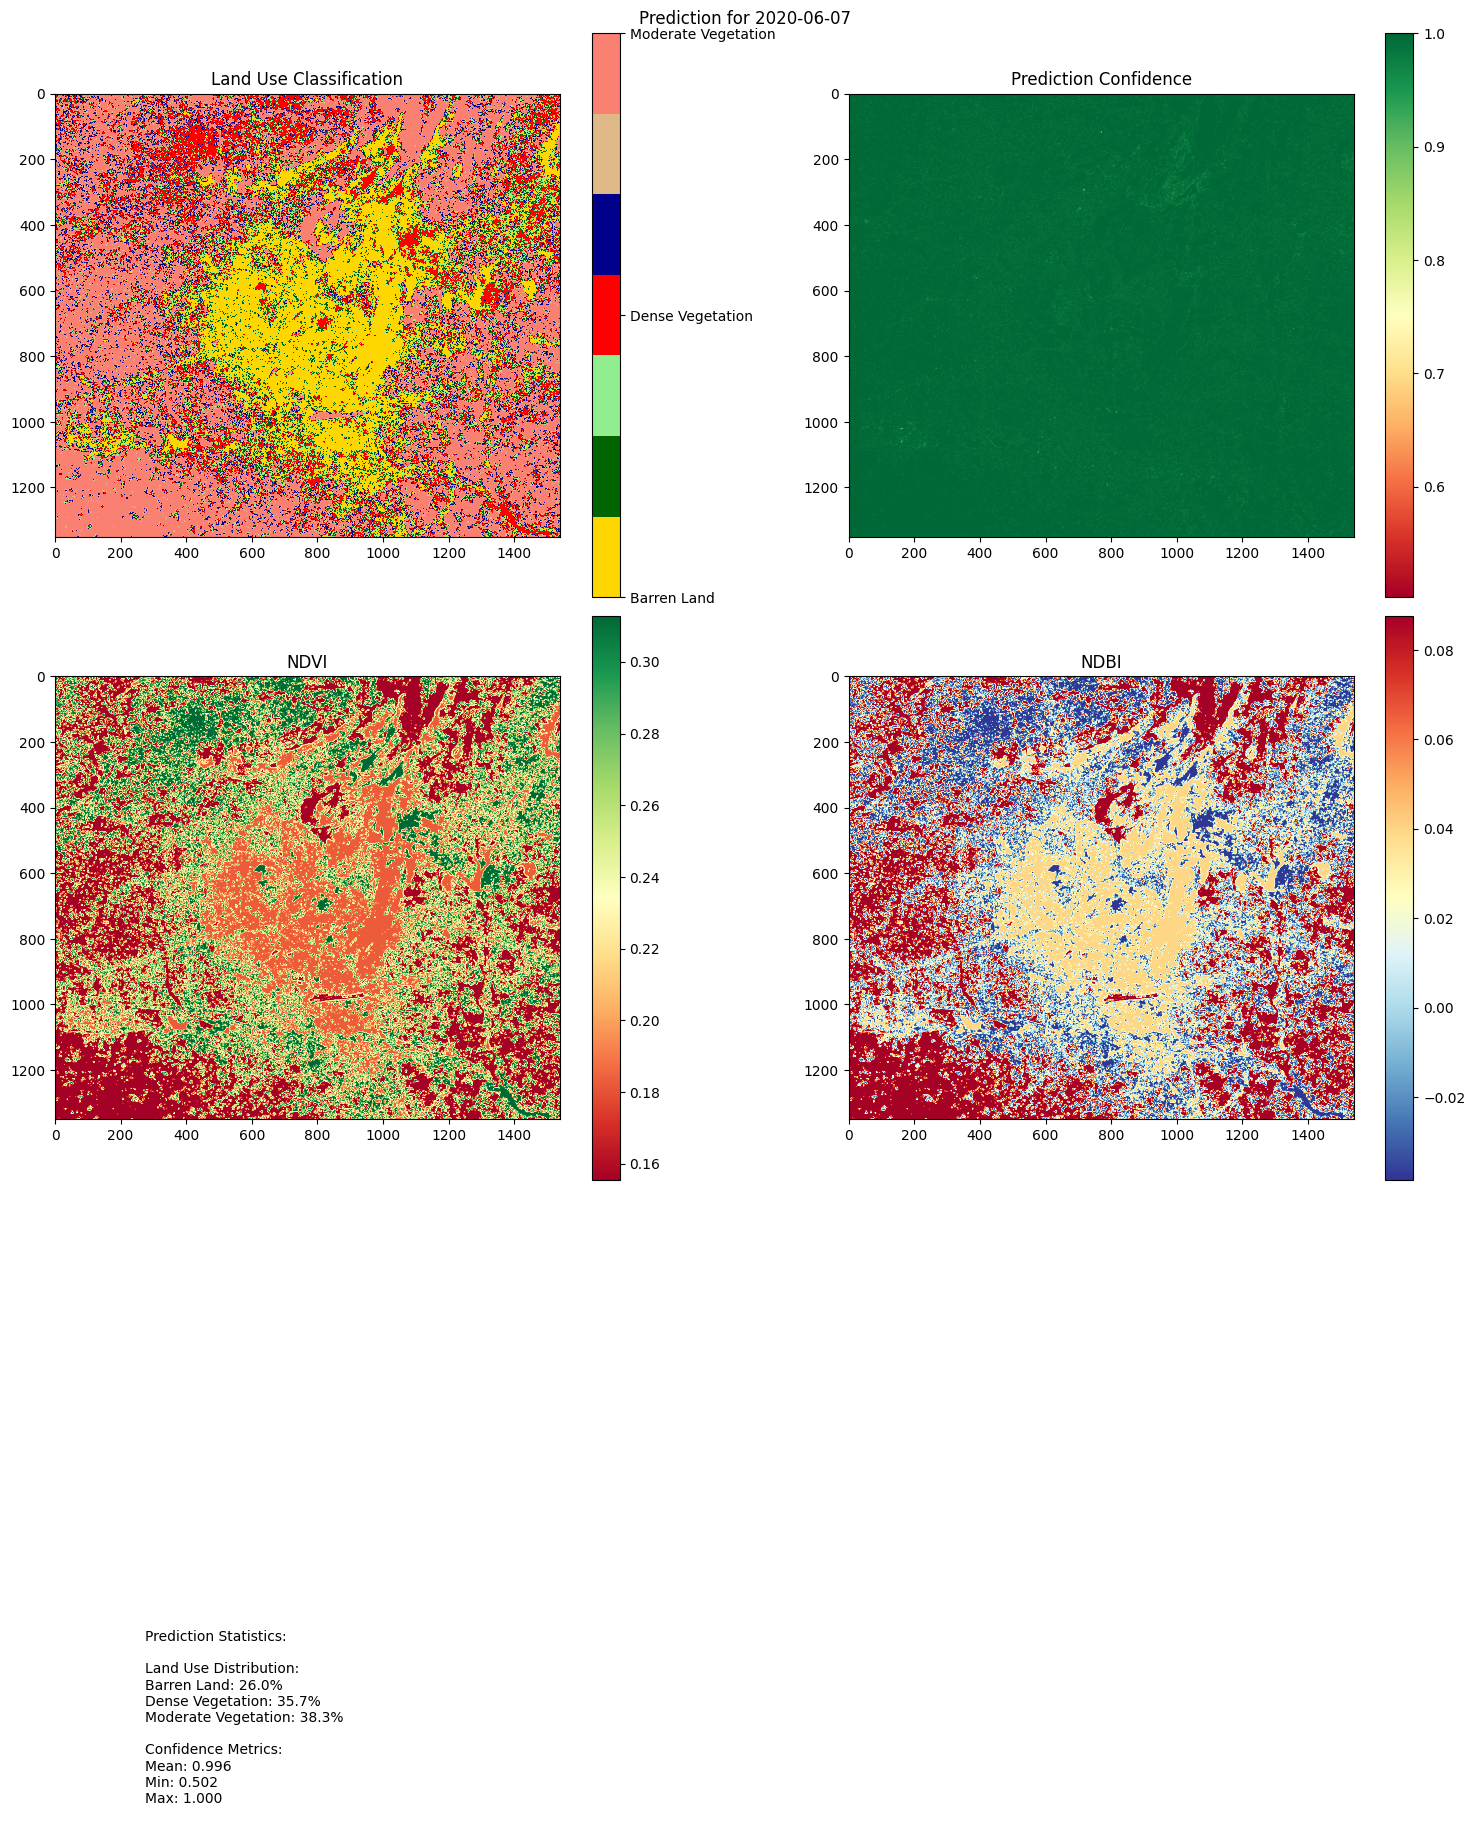

In [13]:
model.plot_prediction(predictions[0])

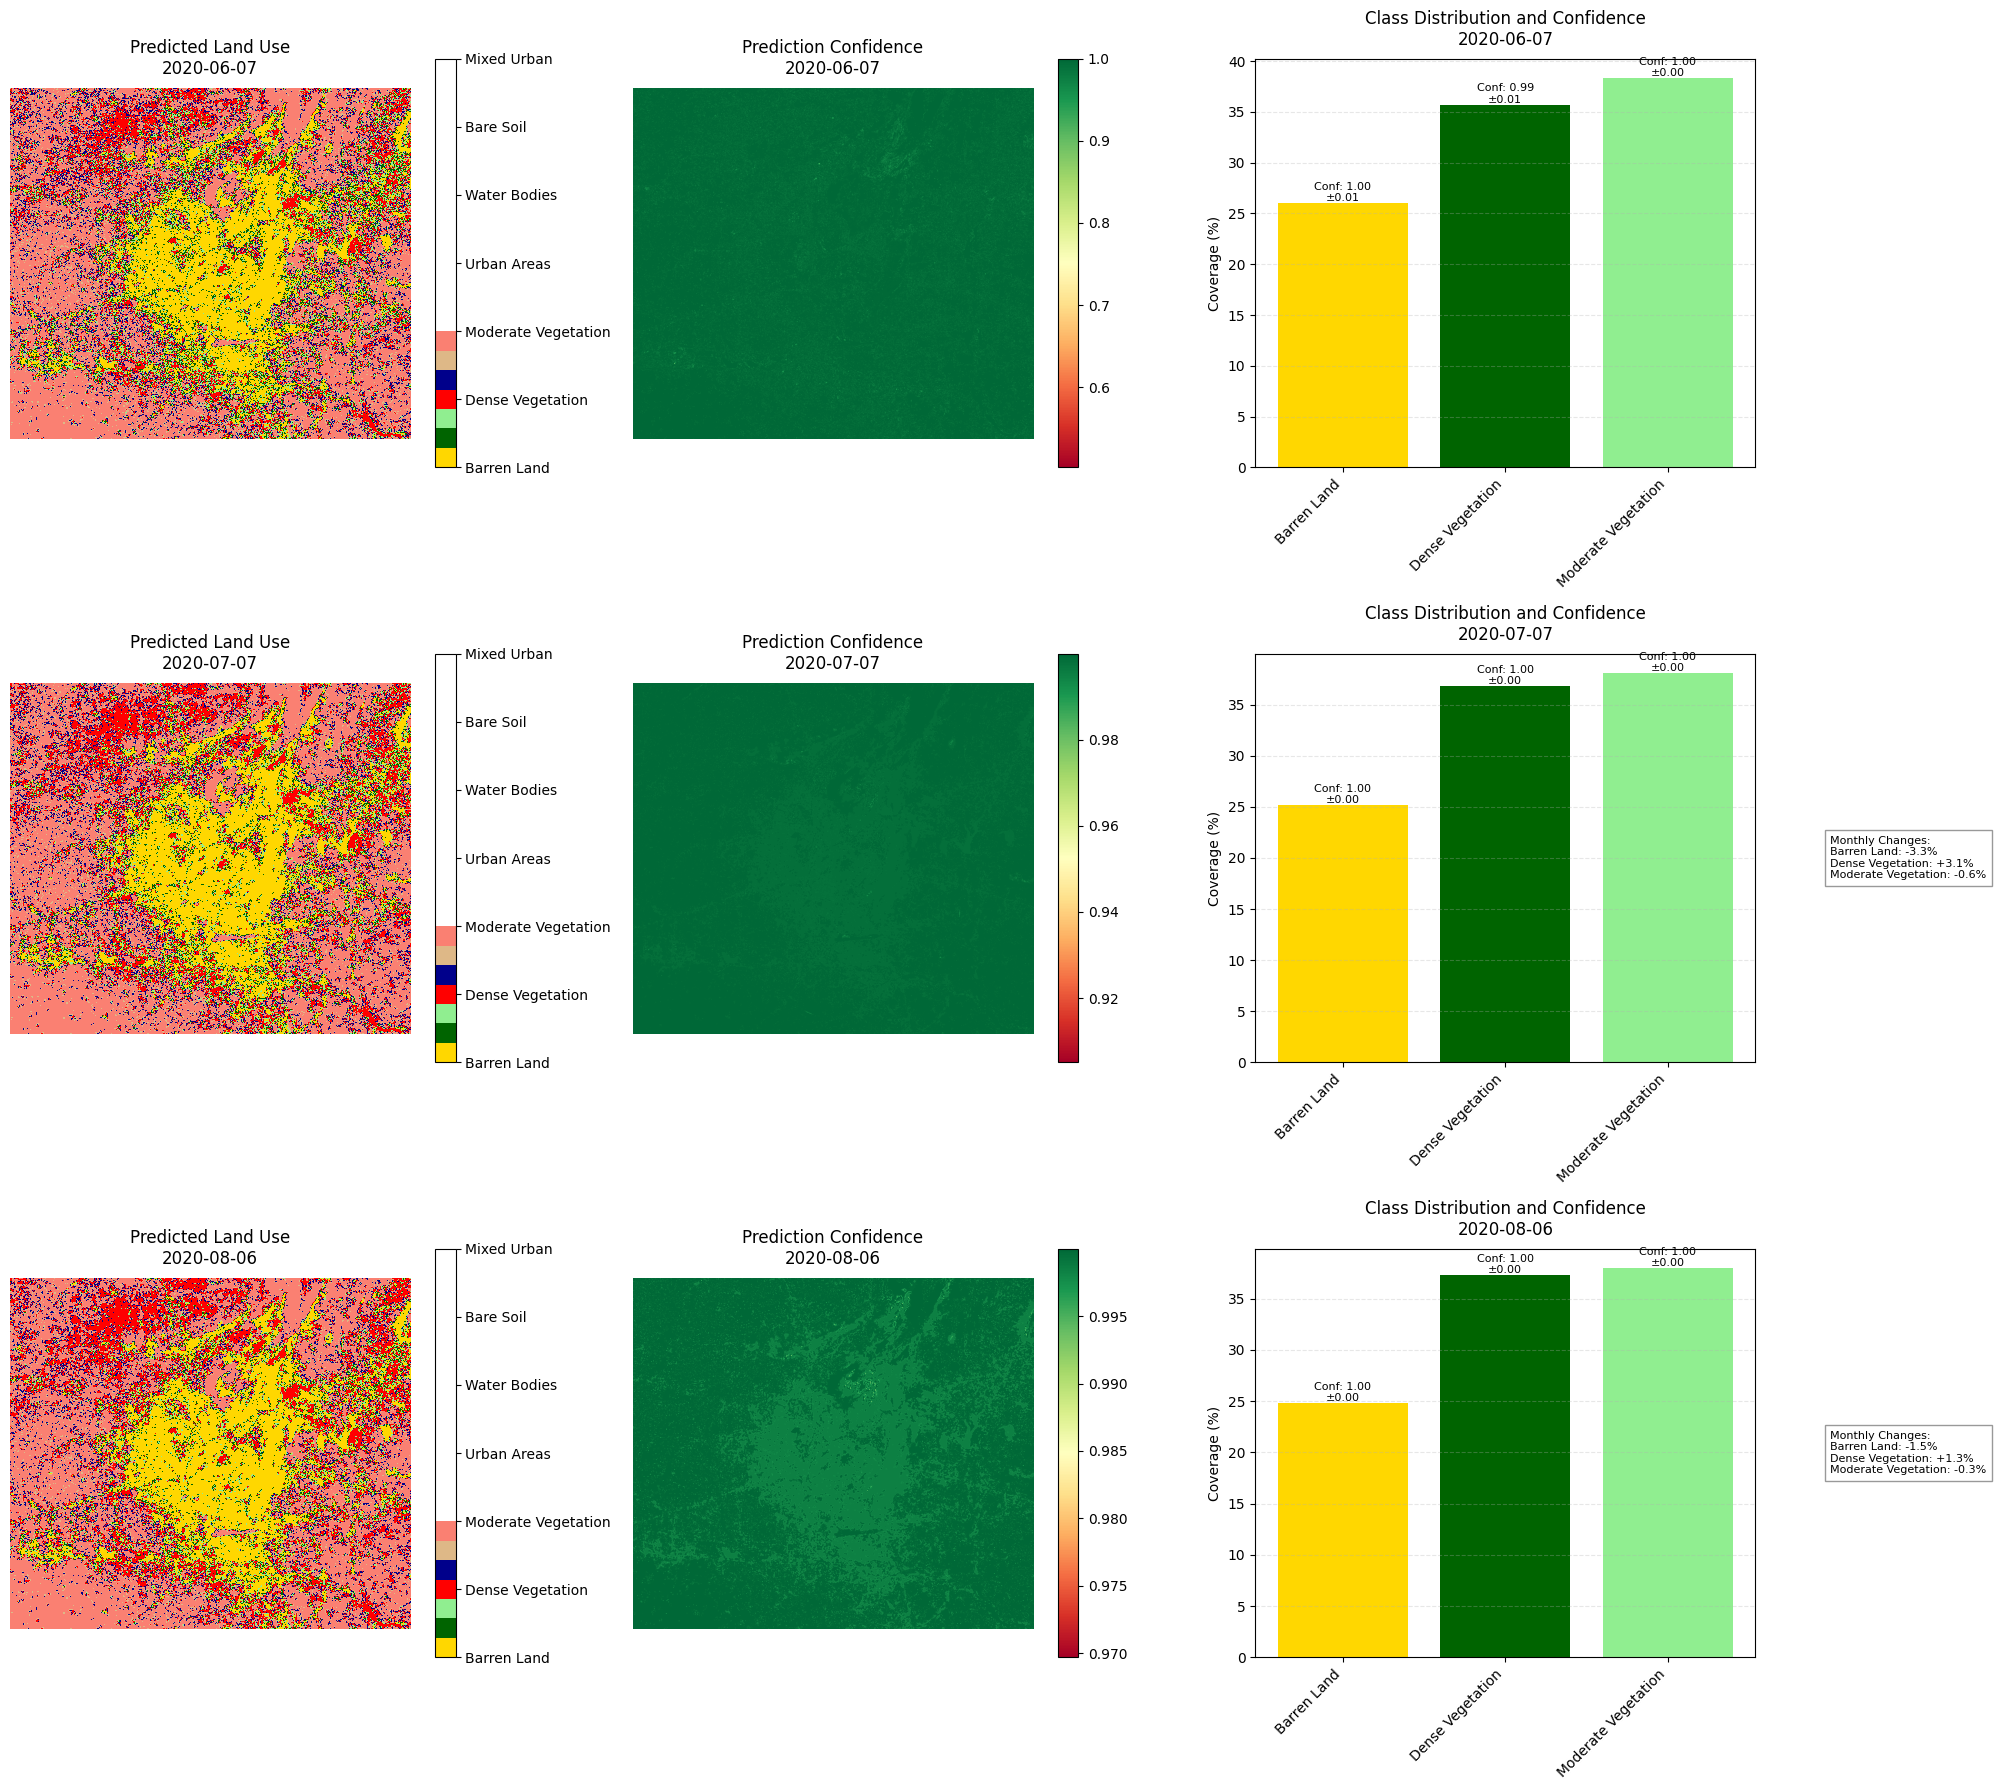


Detailed Prediction Statistics:

Prediction 1 - 2020-06-07:

Class Distribution and Confidence:

Barren Land:
  Coverage: 26.0% (541,132 pixels)
  Confidence: 0.996 ± 0.008
  Range: 0.798 - 1.000

Dense Vegetation:
  Coverage: 35.7% (742,207 pixels)
  Confidence: 0.993 ± 0.012
  Range: 0.502 - 1.000

Moderate Vegetation:
  Coverage: 38.3% (797,201 pixels)
  Confidence: 0.999 ± 0.004
  Range: 0.556 - 1.000

Overall Confidence: 0.996 ± 0.009

Prediction 2 - 2020-07-07:

Class Distribution and Confidence:

Barren Land:
  Coverage: 25.1% (523,115 pixels)
  Confidence: 0.998 ± 0.001
  Range: 0.982 - 1.000

Dense Vegetation:
  Coverage: 36.8% (765,403 pixels)
  Confidence: 1.000 ± 0.001
  Range: 0.905 - 1.000

Moderate Vegetation:
  Coverage: 38.1% (792,022 pixels)
  Confidence: 1.000 ± 0.001
  Range: 0.966 - 1.000

Overall Confidence: 0.999 ± 0.001

Changes from previous prediction: 4.4% of pixels

Prediction 3 - 2020-08-06:

Class Distribution and Confidence:

Barren Land:
  Coverage: 24.

In [14]:
visualize_predictions(predictions)

In [15]:
for pred in predictions:
    print(f"\nPrediction for {pred['date_str']}:")
    unique, counts = np.unique(pred['classification'], return_counts=True)
    for cls, count in zip(unique, counts):
        print(f"Class {cls} ({model.class_mapping[cls]}): {count} pixels")
    print(f"Mean confidence: {np.mean(pred['confidence']):.3f}")


Prediction for 2020-06-07:
Class 0 (Barren Land): 541132 pixels
Class 1 (Dense Vegetation): 742207 pixels
Class 2 (Moderate Vegetation): 797201 pixels
Mean confidence: 0.996

Prediction for 2020-07-07:
Class 0 (Barren Land): 523115 pixels
Class 1 (Dense Vegetation): 765403 pixels
Class 2 (Moderate Vegetation): 792022 pixels
Mean confidence: 0.999

Prediction for 2020-08-06:
Class 0 (Barren Land): 515487 pixels
Class 1 (Dense Vegetation): 775233 pixels
Class 2 (Moderate Vegetation): 789820 pixels
Mean confidence: 0.999


In [16]:
analyzer = ModelAnalysis()

In [17]:
print("\nAnalyzing class distribution...")
class_dist = analyzer.analyze_class_distribution(predictions)
print(class_dist)
        
print("\nAnalyzing prediction confidence...")
confidence_analysis = analyzer.analyze_confidence(predictions)
print(confidence_analysis)
        
print("\nAnalyzing spatial changes...")
spatial_changes = analyzer.analyze_spatial_changes(predictions)
print(spatial_changes)


Analyzing class distribution...
         date  total_pixels  class_0_percent  class_0_confidence  \
0  2020-06-07       2080540        26.009209            0.995702   
1  2020-07-07       2080540        25.143232            0.998283   
2  2020-08-06       2080540        24.776596            0.998157   

   class_1_percent  class_1_confidence  class_2_percent  class_2_confidence  \
0        35.673767            0.992796        38.317023            0.998844   
1        36.788670            0.999643        38.068098            0.999710   
2        37.261144            0.999835        37.962260            0.999682   

   class_3_percent  class_3_confidence  class_4_percent  class_4_confidence  \
0              0.0                   0              0.0                   0   
1              0.0                   0              0.0                   0   
2              0.0                   0              0.0                   0   

   class_5_percent  class_5_confidence  class_6_percent  cla

In [18]:
total_data = all_processed_data + predictions

In [19]:
P_map = create_prediction_map_with_slider(total_data, bounds, roi_gdf)
P_map

Map(center=[26.907436, 75.794157], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

In [20]:
P_view = create_prediction_viewer(total_data)
display(P_view)